<a href="https://colab.research.google.com/github/9105507/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AA_PRACTICA3_GRUPO_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Grupo 7**
Miguel Ángel Rojo

Miguel Poyatos García-Lorenzana

Jorge Barcenilla González

# INTRODUCCIÓN

En esta práctica se va a desarrollar una Red Neuronal Convolucional con el objetivo de obtener el mejor resultado posible en la precisión de los datos de test para la base de datos denominada CIFAR100.

CIFAR-100 es un conjunto de datos utilizado en el campo de la visión por computadora y el aprendizaje profundo. Es una versión más avanzada y compleja del conjunto de datos CIFAR-10. La sigla CIFAR significa "Canadian Institute for Advanced Research" (Instituto Canadiense de Investigación Avanzada). El conjunto de datos CIFAR-100 consta de 60,000 imágenes a color de 32x32 píxeles, pero a diferencia de CIFAR-10, cada imagen se clasifica en una de las 100 clases diferentes en lugar de solo 10. Estas 100 clases se dividen en 20 superclases, cada una de las cuales contiene 5 clases individuales. Aquí la lista de las diferentes clases con sus correspondientes superclases:

  | Clase                   | Superclase                       |
  |-------------------------|----------------------------------|
  | beaver                  | aquatic mammals                  |
  | dolphin                 | aquatic mammals                  |
  | otter                   | aquatic mammals                  |
  | seal                    | aquatic mammals                  |
  | whale                   | aquatic mammals                  |
  | aquarium fish           | fish                             |
  | flatfish                | fish                             |
  | ray                     | fish                             |
  | shark                   | fish                             |
  | trout                   | fish                             |
  | orchids                 | flowers                          |
  | poppies                 | flowers                          |
  | roses                   | flowers                          |
  | sunflowers              | flowers                          |
  | tulips                  | flowers                          |
  | bottles                 | food containers                  |
  | bowls                   | food containers                  |
  | cans                    | food containers                  |
  | cups                    | food containers                  |
  | plates                  | food containers                  |
  | apples                  | fruit and vegetables             |
  | mushrooms               | fruit and vegetables             |
  | oranges                 | fruit and vegetables             |
  | pears                   | fruit and vegetables             |
  | sweet peppers           | fruit and vegetables             |
  | clock                   | household electrical devices     |
  | computer keyboard       | household electrical devices     |
  | lamp                    | household electrical devices     |
  | telephone               | household electrical devices     |
  | television              | household electrical devices     |
  | bed                     | household furniture              |
  | chair                   | household furniture              |
  | couch                   | household furniture              |
  | table                   | household furniture              |
  | wardrobe                | household furniture              |
  | bee                     | insects                          |
  | beetle                  | insects                          |
  | butterfly               | insects                          |
  | caterpillar             | insects                          |
  | cockroach               | insects                          |
  | bear                    | large carnivores                 |
  | leopard                 | large carnivores                 |
  | lion                    | large carnivores                 |
  | tiger                   | large carnivores                 |
  | wolf                    | large carnivores                 |
  | bridge                  | large man-made outdoor things    |
  | castle                  | large man-made outdoor things    |
  | house                   | large man-made outdoor things    |
  | road                    | large man-made outdoor things    |
  | skyscraper              | large man-made outdoor things    |
  | cloud                   | large natural outdoor scenes     |
  | forest                  | large natural outdoor scenes     |
  | mountain                | large natural outdoor scenes     |
  | plain                   | large natural outdoor scenes     |
  | sea                     | large natural outdoor scenes     |
  | camel                   | large omnivores and herbivores   |
  | cattle                  | large omnivores and herbivores   |
  | chimpanzee              | large omnivores and herbivores   |
  | elephant                | large omnivores and herbivores   |
  | kangaroo                | large omnivores and herbivores   |
  | fox                     | medium-sized mammals              |
  | porcupine               | medium-sized mammals              |
  | possum                  | medium-sized mammals              |
  | raccoon                 | medium-sized mammals              |
  | skunk                   | medium-sized mammals              |
  | crab                    | non-insect invertebrates          |
  | lobster                 | non-insect invertebrates          |
  | snail                   | non-insect invertebrates          |
  | spider                  | non-insect invertebrates          |
  | worm                    | non-insect invertebrates          |
  | baby                    | people                           |
  | boy                     | people                           |
  | girl                    | people                           |
  | man                     | people                           |
  | woman                   | people                           |
  | crocodile               | reptiles                         |
  | dinosaur                | reptiles                         |
  | lizard                  | reptiles                         |
  | snake                   | reptiles                         |
  | turtle                  | reptiles                         |
  | hamster                 | small mammals                    |
  | mouse                   | small mammals                    |
  | rabbit                  | small mammals                    |
  | shrew                   | small mammals                    |
  | squirrel                | small mammals                    |
  | maple                   | trees                            |
  | oak                     | trees                            |
  | palm                    | trees                            |
  | pine                    | trees                            |
  | willow                  | trees                            |
  | bicycle                 | vehicles 1                       |
  | bus                     | vehicles 1                       |
  | motorcycle              | vehicles 1                       |
  | pickup truck            | vehicles 1                       |
  | train                   | vehicles 1                       |
  | lawn-mower              | vehicles 2                       |
  | rocket                  | vehicles 2                       |
  | streetcar               | vehicles 2                       |
  | tank                    | vehicles 2                       |
  | tractor                 | vehicles 2                       |

El objetivo es crear un modelo de redes neuronales convolucionales que reconozca y clasifique estas imágenes en sus clases correspondientes, maximizando la puntuación de test. Este modelo será definido, configurado, entrenado, evaluado y mejorado progresivamente a lo largo de esta práctica.

# FUNCIONES IMPORTANTES:

In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
def evaluar_rendimiento(train_loss, train_acc, val_loss, val_acc):
    # Configuración de la figura para las gráficas
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Gráfica de pérdida
    axs[0].plot(range(1, len(train_loss) + 1), train_loss, label='Pérdida de entrenamiento')
    axs[0].plot(range(1, len(val_loss) + 1), val_loss, label='Pérdida de validación')
    axs[0].set_xlabel('Época')
    axs[0].set_ylabel('Pérdida')
    axs[0].legend()
    axs[0].set_title('Gráfica de Pérdida')

    # Gráfica de precisión
    axs[1].plot(range(1, len(train_acc) + 1), train_acc, label='Precisión de entrenamiento')
    axs[1].plot(range(1, len(val_acc) + 1), val_acc, label='Precisión de validación')
    axs[1].set_xlabel('Época')
    axs[1].set_ylabel('Precisión')
    axs[1].legend()
    axs[1].set_title('Gráfica de Precisión')

    plt.show()

In [4]:
global super_to_sub
super_to_sub = {
    "aquatic mammals": ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    "fish": ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    "flowers": ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    "food containers": ['bottle', 'bowl', 'can', 'cup', 'plate'],
    "fruit and vegetables": ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    "household electrical devices": ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    "household furniture": ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    "insects": ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    "large carnivores": ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    "large man-made outdoor things": ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    "large natural outdoor scenes": ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    "large omnivores and herbivores": ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    "medium-sized mammals": ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    "non-insect invertebrates": ['crab', 'lobster', 'snail', 'spider', 'worm'],
    "people": ['baby', 'boy', 'girl', 'man', 'woman'],
    "reptiles": ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    "small mammals": ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    "trees": ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    "vehicles 1": ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    "vehicles 2": ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']}
def find_superclass(class_name):
  for superclass, classes in super_to_sub.items():
      if class_name in classes:
          return superclass
  return None
def find_superclass_index(class_name):
  for superclass, classes in super_to_sub.items():
      if class_name in classes:
          # Busca el índice de la superclase en la lista de nombres de superclases
          return super_class_names.index(superclass)
  return None

# Inicialización de datos
En primer lugar, se importan todas las librerías que son necesarias a lo largo de esta práctica:

In [5]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import utils
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


También, se comprueba que se está utilizando una version de TensorFlow 2.0.0 o superior:

In [6]:
print(tf.__version__)

2.14.0


A continuación, se cargan los datos de entrenamiento y de test a partir del método 'keras.datasets.cifar100'. Estos datos son los que se van a estar utilizando a lo largo de toda esta práctica.

In [7]:
cifar100 = keras.datasets.cifar100
(X, y), (test_X, test_y) = cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


# Pre procesado de datos / Visualización de los datos

Se comprueba que se han descargado las 60000 imágenes en cuestión:

In [8]:
print("TAMAÑO TRAIN_DATA:",X.shape)
print("TAMAÑO TEST_DATA:",test_X.shape)
print("TAMAÑO TRAIN_LABELS:",y.shape)
print("TAMAÑO TEST_LABELS:",test_y.shape)

TAMAÑO TRAIN_DATA: (50000, 32, 32, 3)
TAMAÑO TEST_DATA: (10000, 32, 32, 3)
TAMAÑO TRAIN_LABELS: (50000, 1)
TAMAÑO TEST_LABELS: (10000, 1)


Se presentan las listas 'super_class_names', 'class_names'. Se presentan estas listas para comprobar los datos que se han descargado de cifar100 con fines de visualización de datos.

In [12]:
super_class_names = ["aquatic mammals",
                     "fish",
                     "flowers",
                     "food containers",
                     "fruit and vegetables",
                     "household electrical devices",
                     "household furniture",
                     "insects", "large carnivores",
                     "large man-made outdoor things",
                     "large natural outdoor scenes",
                     "large omnivores and herbivores",
                     "medium-sized mammals",
                     "non-insect invertebrates",
                     "people",
                     "reptiles",
                     "small mammals",
                     "trees",
                     "vehicles 1",
                     "vehicles 2"]

class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed',
               'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge',
               'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar',
               'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
               'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin',
               'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
               'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard',
               'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle',
               'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
               'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
               'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit',
               'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal',
               'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
               'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
               'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
               'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
               'willow_tree', 'wolf', 'woman', 'worm']

# Se prueba con la función find_superclass la utilidad de estas listas para
# visualizar mejor los datos (están todos en formato numérico y son 100 clases!
# --> esto puede complicar el entendimiento de la base de datos debido a su
# densidad).
index = 0
superclass = find_superclass(class_names[index])
print(f"La superclase de '{class_names[index]}' es '{superclass}'.")

La superclase de 'apple' es 'fruit and vegetables'.


Se observa que la base de datos está perfectamente equilibrada, lo cual es una buena noticia para nosotros. Se realiza con las superclases también por terminar de validarlo.

In [14]:
train_labels_superclass = np.floor_divide(y, 5)
train_labels_superclass = train_labels_superclass.reshape(50000)
index_count = Counter(train_labels_superclass)
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{super_class_names[index]}: {count}')

aquatic mammals: 2500
fish: 2500
flowers: 2500
food containers: 2500
fruit and vegetables: 2500
household electrical devices: 2500
household furniture: 2500
insects: 2500
large carnivores: 2500
large man-made outdoor things: 2500
large natural outdoor scenes: 2500
large omnivores and herbivores: 2500
medium-sized mammals: 2500
non-insect invertebrates: 2500
people: 2500
reptiles: 2500
small mammals: 2500
trees: 2500
vehicles 1: 2500
vehicles 2: 2500


man


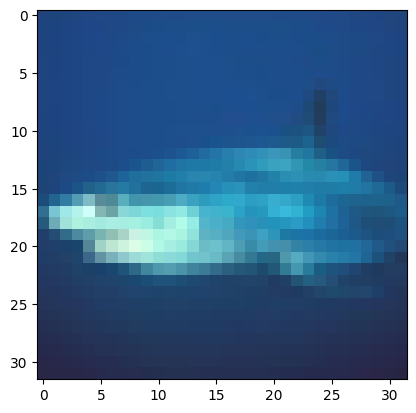

In [69]:
# Supongamos que tienes un array de datos de una imagen
imagen = train_images[49999]
#LA LISTA QUE SE HA CREADO NO ESTÁ ORDENADA IGUAL QUE COMO VIENEN LOS DATOS!!!!
print(class_names[train_labels[49999]])
# Mostrar la imagen usando imshow()
plt.imshow(imagen)
plt.show()

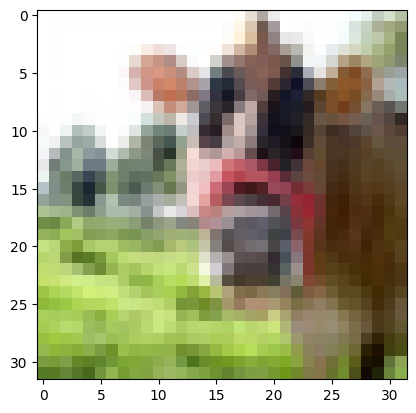

In [55]:
# Veamos el elemento 0 (que vemos que es un dinosaurio) y pintémoslo con matplotlib
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [63]:
# La matriz de rojos
red_matrix = np.take(digit, 0, axis=2)


# Vemos la matriz de la imagen número 30.000 (28x28)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(red_matrix))

[[255 255 255 ... 195 212 182]
 [255 254 254 ... 170 161 146]
 [255 254 255 ... 189 166 121]
 ...
 [148 142 140 ...  30  65  76]
 [122 120 126 ...  22  97 141]
 [ 87  88 101 ...  34 105 138]]


In [67]:
# La imagen anterior corresponde con el número 3. Hasta se puede intuir....
#LA LISTA QUE SE HA CREADO NO ESTÁ ORDENADA IGUAL QUE COMO VIENEN LOS DATOS!!!!
class_names[train_labels[0]]

'plates'

cockroach


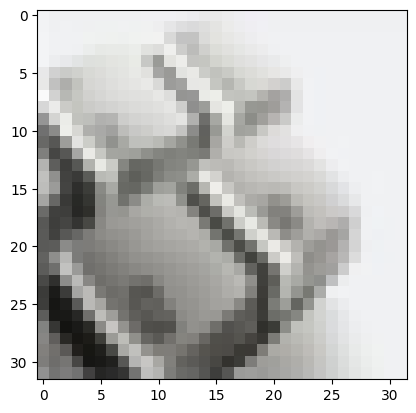

In [68]:
# Veamos el elemento 30000 y pintémoslo con matplotlib
digit = train_images[30000]
#LA LISTA QUE SE HA CREADO NO ESTÁ ORDENADA IGUAL QUE COMO VIENEN LOS DATOS!!!!
print(class_names[train_labels[30000]])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Los **datos de prueba**:

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
len(test_labels)

In [ ]:
# Veamos el elemento 0 de test (que vemos que es un t) y pintémoslo con matplotlib
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels

Con el objetivo de ver el balance de la base de datos, se ejecuta el siguiente código:

In [ ]:
train_labels = y.reshape(50000)
index_count = Counter(train_labels)
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names[index]}: {count}')

apple: 500
aquarium_fish: 500
baby: 500
bear: 500
beaver: 500
bed: 500
bee: 500
beetle: 500
bicycle: 500
bottle: 500
bowl: 500
boy: 500
bridge: 500
bus: 500
butterfly: 500
camel: 500
can: 500
castle: 500
caterpillar: 500
cattle: 500
chair: 500
chimpanzee: 500
clock: 500
cloud: 500
cockroach: 500
couch: 500
crab: 500
crocodile: 500
cup: 500
dinosaur: 500
dolphin: 500
elephant: 500
flatfish: 500
forest: 500
fox: 500
girl: 500
hamster: 500
house: 500
kangaroo: 500
keyboard: 500
lamp: 500
lawn_mower: 500
leopard: 500
lion: 500
lizard: 500
lobster: 500
man: 500
maple_tree: 500
motorcycle: 500
mountain: 500
mouse: 500
mushroom: 500
oak_tree: 500
orange: 500
orchid: 500
otter: 500
palm_tree: 500
pear: 500
pickup_truck: 500
pine_tree: 500
plain: 500
plate: 500
poppy: 500
porcupine: 500
possum: 500
rabbit: 500
raccoon: 500
ray: 500
road: 500
rocket: 500
rose: 500
sea: 500
seal: 500
shark: 500
shrew: 500
skunk: 500
skyscraper: 500
snail: 500
snake: 500
spider: 500
squirrel: 500
streetcar: 500
su

Para finalizar el pre-procesado de datos, se normalizan los datos, se tranforman las etiquetas a 'one-hot' encoding y se hace la partición de los datos en train-validation-test.

In [ ]:
# Se normalizan los datos:
Xnorm = X/255
test_Xnorm = test_X/255

# Se convierten las etiquetas a codificación one-hot
y_categorical = to_categorical(y)
test_y_categorical = to_categorical(test_y)

# Se dividen los datos en train y validation:
train_X = Xnorm[:47000]
train_y = y_categorical[:47000]
val_X = Xnorm[-3000:]
val_y = y_categorical[-3000:]

# MODELO

In [ ]:
# Convertir las etiquetas a codificación one-hot
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=500,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
100/100 [==============================] - 84s 834ms/step - loss: 6.6393 - accuracy: 0.0171
Epoch 2/5
100/100 [==============================] - 87s 873ms/step - loss: 4.5814 - accuracy: 0.0258
Epoch 3/5
100/100 [==============================] - 83s 831ms/step - loss: 4.5105 - accuracy: 0.0382
Epoch 4/5
100/100 [==============================] - 82s 824ms/step - loss: 4.4504 - accuracy: 0.0504
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 4.4424 - accuracy: 0.0499
Test accuracy: 0.04989999905228615
